In [8]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
train_folder = 'C:/mini project/Covid-19 Image Dataset/Covid19-dataset/train'
test_folder = 'C:/mini project/Covid-19 Image Dataset/Covid19-dataset/test'

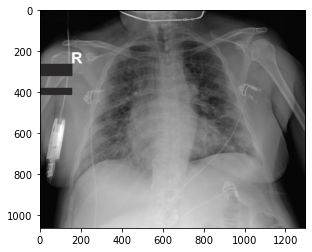

In [11]:
img = image.load_img('C:/mini project/Covid-19 Image Dataset/Covid19-dataset/train/Covid/091.jpg')
plt.imshow(img)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   vertical_flip = True,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (64,64),
                                                 batch_size = 32
                                                )
test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64,64),
                                            batch_size = 32
                                           )

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

In [14]:
model.compile(optimizer='adam',
              metrics = ['accuracy'],
              loss = 'categorical_crossentropy'
             )

In [15]:
history = model.fit(training_set,
         epochs = 15,
         validation_data = test_set
         )

Epoch 1/15
8/8 [==============================] - 58s 6s/step - loss: 0.7555 - accuracy: 0.6892 - val_loss: 1.0926 - val_accuracy: 0.3030
Epoch 2/15
8/8 [==============================] - 30s 4s/step - loss: 0.3571 - accuracy: 0.8725 - val_loss: 1.0319 - val_accuracy: 0.6364
Epoch 3/15
8/8 [==============================] - 33s 4s/step - loss: 0.2598 - accuracy: 0.8884 - val_loss: 0.9831 - val_accuracy: 0.6364
Epoch 4/15
8/8 [==============================] - 31s 4s/step - loss: 0.2777 - accuracy: 0.9084 - val_loss: 0.9990 - val_accuracy: 0.3939
Epoch 5/15
8/8 [==============================] - 32s 4s/step - loss: 0.2142 - accuracy: 0.9363 - val_loss: 1.1137 - val_accuracy: 0.3939
Epoch 6/15
8/8 [==============================] - 33s 4s/step - loss: 0.2331 - accuracy: 0.9203 - val_loss: 1.5421 - val_accuracy: 0.3939
Epoch 7/15
8/8 [==============================] - 30s 4s/step - loss: 0.2747 - accuracy: 0.8845 - val_loss: 2.1899 - val_accuracy: 0.3939
Epoch 8/15
8/8 [==================

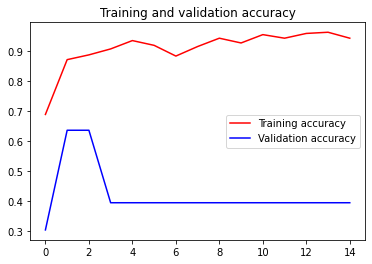

<Figure size 432x288 with 0 Axes>

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()